In [1]:
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Capstone Project/Data.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [4]:
import os

# Directory with number and alphabet pictures
number_0_dir = os.path.join('/tmp/Dataset/0')
number_1_dir = os.path.join('/tmp/Dataset/1')
number_2_dir = os.path.join('/tmp/Dataset/2')
number_3_dir = os.path.join('/tmp/Dataset/3')
number_4_dir = os.path.join('/tmp/Dataset/4')
number_5_dir = os.path.join('/tmp/Dataset/5')
number_6_dir = os.path.join('/tmp/Dataset/6')
number_7_dir = os.path.join('/tmp/Dataset/7')
number_8_dir = os.path.join('/tmp/Dataset/8')
number_9_dir = os.path.join('/tmp/Dataset/9')
A_dir = os.path.join('/tmp/Dataset/A')
B_dir = os.path.join('/tmp/Dataset/B')
C_dir = os.path.join('/tmp/Dataset/C')
D_dir = os.path.join('/tmp/Dataset/D')
E_dir = os.path.join('/tmp/Dataset/E')
F_dir = os.path.join('/tmp/Dataset/F')
G_dir = os.path.join('/tmp/Dataset/G')
H_dir = os.path.join('/tmp/Dataset/H')
I_dir = os.path.join('/tmp/Dataset/I')
J_dir = os.path.join('/tmp/Dataset/J')
K_dir = os.path.join('/tmp/Dataset/K')
L_dir = os.path.join('/tmp/Dataset/L')
M_dir = os.path.join('/tmp/Dataset/M')
N_dir = os.path.join('/tmp/Dataset/N')
O_dir = os.path.join('/tmp/Dataset/O')
P_dir = os.path.join('/tmp/Dataset/P')
Q_dir = os.path.join('/tmp/Dataset/Q')
R_dir = os.path.join('/tmp/Dataset/R')
S_dir = os.path.join('/tmp/Dataset/S')
T_dir = os.path.join('/tmp/Dataset/T')
U_dir = os.path.join('/tmp/Dataset/U')
V_dir = os.path.join('/tmp/Dataset/V')
W_dir = os.path.join('/tmp/Dataset/W')
X_dir = os.path.join('/tmp/Dataset/X')
Y_dir = os.path.join('/tmp/Dataset/Y')
Z_dir = os.path.join('/tmp/Dataset/Z')

In [5]:
number_0 = os.listdir(number_0_dir)
number_1 = os.listdir(number_1_dir)
number_2 = os.listdir(number_2_dir)
number_3 = os.listdir(number_3_dir)
number_4 = os.listdir(number_4_dir)
number_5 = os.listdir(number_5_dir)
number_6 = os.listdir(number_6_dir)
number_7 = os.listdir(number_7_dir)
number_8 = os.listdir(number_8_dir)
number_9 = os.listdir(number_9_dir)
alp_A = os.listdir(A_dir)
alp_B = os.listdir(B_dir)
alp_C = os.listdir(C_dir)
alp_D = os.listdir(D_dir)
alp_E = os.listdir(E_dir)
alp_F = os.listdir(F_dir)
alp_G = os.listdir(G_dir)
alp_H = os.listdir(H_dir)
alp_I = os.listdir(I_dir)
alp_J = os.listdir(J_dir)
alp_K = os.listdir(K_dir)
alp_L = os.listdir(L_dir)
alp_M = os.listdir(M_dir)
alp_N = os.listdir(N_dir)
alp_O = os.listdir(O_dir)
alp_P = os.listdir(P_dir)
alp_Q = os.listdir(Q_dir)
alp_R = os.listdir(R_dir)
alp_S = os.listdir(S_dir)
alp_T = os.listdir(T_dir)
alp_U = os.listdir(U_dir)
alp_V = os.listdir(V_dir)
alp_W = os.listdir(W_dir)
alp_X = os.listdir(X_dir)
alp_Y = os.listdir(Y_dir)
alp_Z = os.listdir(Z_dir)

In [6]:
# Printing the first 10 items in each directory
print(f'0: {number_0[:5]}')
print(f'1: {number_1[:5]}')
print(f'2: {number_2[:5]}')
print(f'3: {number_3[:5]}')
print(f'4: {number_4[:5]}')
print(f'5: {number_5[:5]}')
print(f'6: {number_6[:5]}')
print(f'7: {number_7[:5]}')
print(f'8: {number_8[:5]}')
print(f'9: {number_9[:5]}')
print(f'A: {alp_A[:5]}')
print(f'B: {alp_B[:5]}')
print(f'C: {alp_C[:5]}')
print(f'D: {alp_D[:5]}')
print(f'E: {alp_E[:5]}')
print(f'F: {alp_F[:5]}')
print(f'G: {alp_G[:5]}')
print(f'H: {alp_H[:5]}')
print(f'I: {alp_I[:5]}')
print(f'J: {alp_J[:5]}')
print(f'K: {alp_K[:5]}')
print(f'L: {alp_L[:5]}')
print(f'M: {alp_M[:5]}')
print(f'N: {alp_N[:5]}')
print(f'O: {alp_O[:5]}')
print(f'P: {alp_P[:5]}')
print(f'Q: {alp_Q[:5]}')
print(f'R: {alp_R[:5]}')
print(f'S: {alp_S[:5]}')
print(f'T: {alp_T[:5]}')
print(f'U: {alp_U[:5]}')
print(f'V: {alp_V[:5]}')
print(f'W: {alp_W[:5]}')
print(f'X: {alp_X[:5]}')
print(f'Y: {alp_Y[:5]}')
print(f'Z: {alp_Z[:5]}')

0: ['0_34_rotate_3.jpeg', '0_58_rotate_9.jpeg', '0_23_rotate_9.jpeg', '0_22_rotate_5.jpeg', '0_44_rotate_3.jpeg']
1: ['IMG_4977.JPG', 'IMG_4675.JPG', 'IMG_1250.JPG', 'IMG_5549.JPG', '1_32_rotate_1.jpeg']
2: ['2_21_rotate_5.jpeg', '2_31_rotate_1.jpeg', '2_42_rotate_7.jpeg', '2_30_rotate_4.jpeg', '2_9_rotate_3.jpeg']
3: ['3_45_rotate_9.jpeg', 'IMG_4889.JPG', '3_32_rotate_8.jpeg', '3_15_rotate_1.jpeg', '3_7_rotate_8.jpeg']
4: ['4_27_rotate_5.jpeg', '4_64_rotate_3.jpeg', '4_34_rotate_4.jpeg', '4_31_rotate_6.jpeg', 'IMG_5975.JPG']
5: ['IMG_4951.JPG', '5_66_rotate_2.jpeg', '5_3_rotate_9.jpeg', '5_40_rotate_4.jpeg', '5_1_rotate_4.jpeg']
6: ['6_25_rotate_5.jpeg', '6_61_rotate_10.jpeg', 'IMG_4376.JPG', '6_60_rotate_8.jpeg', '6_51_rotate_1.jpeg']
7: ['7_9_rotate_1.jpeg', 'IMG_4581.JPG', 'IMG_5347.JPG', 'IMG_4772.JPG', '7_11_rotate_5.jpeg']
8: ['IMG_5545.JPG', '8_43_rotate_3.jpeg', '8_28_rotate_4.jpeg', '8_24_rotate_8.jpeg', '8_1_rotate_7.jpeg']
9: ['9_5_rotate_7.jpeg', '9_38_rotate_1.jpeg', '9_1

In [7]:
# Concatenate paths to each directory
total_data = [
    number_0_dir, number_1_dir, number_2_dir, number_3_dir, number_4_dir, number_5_dir,
    number_6_dir, number_7_dir, number_8_dir, number_9_dir, A_dir, B_dir, C_dir, D_dir,
    E_dir, F_dir, G_dir, H_dir, I_dir, J_dir, K_dir, L_dir, M_dir, N_dir, O_dir, P_dir,
    Q_dir, R_dir, S_dir, T_dir, U_dir, V_dir, W_dir, X_dir, Y_dir, Z_dir
]

# Initialize the variable for the total number of images
total_images = 0

# Iterate through all directories and count the number of files
for train_dir in total_data:
    total_images += len(os.listdir(train_dir))

print(f'Total images: {total_images}')

Total images: 88033


**Splitting Data**

In [8]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    files = os.listdir(SOURCE)
    files = [file for file in files if os.path.getsize(os.path.join(SOURCE, file)) > 0]

    # Calculate lengths for each set
    num_files = len(files)
    num_training = int(num_files * SPLIT_SIZE[0])
    num_testing = int(num_files * SPLIT_SIZE[1])
    num_validation = num_files - num_training - num_testing

    # Shuffle the files
    random.shuffle(files)

    # Split into sets
    training_set = files[:num_training]
    testing_set = files[num_training:num_training + num_testing]
    validation_set = files[num_training + num_testing:]

    # Copy files to respective directories
    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TESTING, filename)
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(VALIDATION, filename)
        copyfile(this_file, destination)

# Define source and destination directories
SOURCE_DIR = "/tmp/Dataset/"
TRAINING_DIR = "/tmp/training/"
TESTING_DIR = "/tmp/testing/"
VALIDATION_DIR = "/tmp/validation/"

# Define split size as a tuple (training_size, testing_size, validation_size)
split_size = (0.8, 0.1, 0.1)

# Iterate over each label directory
for label in os.listdir(SOURCE_DIR):
    label_source_dir = os.path.join(SOURCE_DIR, label)
    label_training_dir = os.path.join(TRAINING_DIR, label)
    label_testing_dir = os.path.join(TESTING_DIR, label)
    label_validation_dir = os.path.join(VALIDATION_DIR, label)

    # Create training, testing, and validation directories if they don't exist
    os.makedirs(label_training_dir, exist_ok=True)
    os.makedirs(label_testing_dir, exist_ok=True)
    os.makedirs(label_validation_dir, exist_ok=True)

    # Split data for each label
    split_data(label_source_dir, label_training_dir, label_testing_dir, label_validation_dir, split_size)

In [9]:
# Define directories
TRAINING_DIR = "/tmp/training/"
TESTING_DIR = "/tmp/testing/"
VALIDATION_DIR = "/tmp/validation/"

# Function to count images in subdirectories
def count_images_in_subdirs(directory):
    count = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        count += len(os.listdir(label_dir))
    return count

# Count images in training, testing, and validation directories
num_training_images = count_images_in_subdirs(TRAINING_DIR)
num_testing_images = count_images_in_subdirs(TESTING_DIR)
num_validation_images = count_images_in_subdirs(VALIDATION_DIR)

# Print the counts
print("Number of training images:", num_training_images)
print("Number of testing images:", num_testing_images)
print("Number of validation images:", num_validation_images)

Number of training images: 87305
Number of testing images: 23861
Number of validation images: 23971


**Data Augmentation**

In [10]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255,
                                        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define directories
TRAINING_DIR = "/tmp/training/"
VALIDATION_DIR = "/tmp/validation/"
TESTING_DIR = "/tmp/testing/"

# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

Found 87305 images belonging to 36 classes.
Found 23971 images belonging to 36 classes.
Found 23861 images belonging to 36 classes.


**Examine and Visualize Dataset**

In [11]:
labels = list(train_generator.class_indices.keys())
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


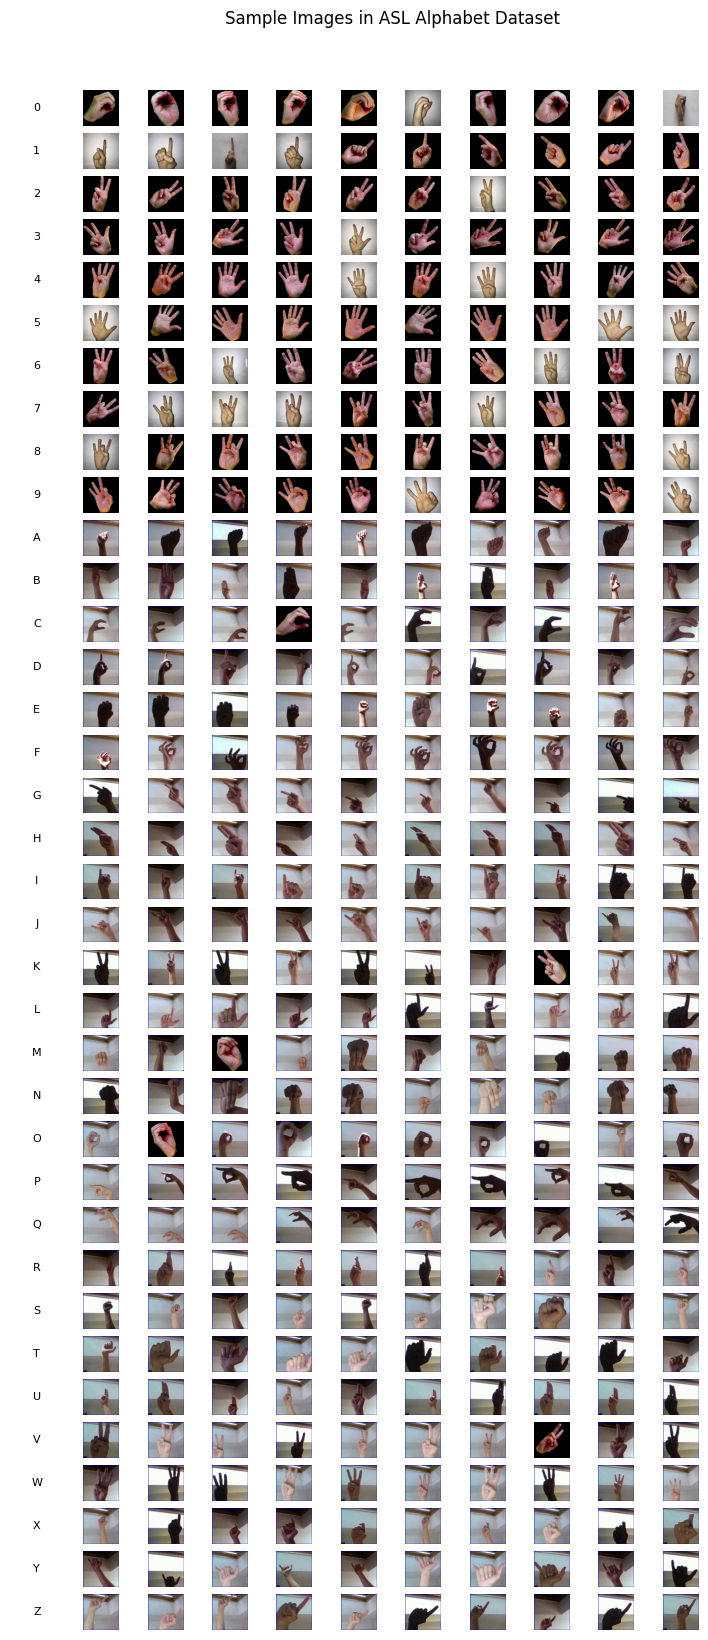

In [12]:
TRAIN_PATH = TRAINING_DIR
def sample_images(labels):
    # Create Subplots
    y_size = 9
    if(len(labels)<10):
        y_size = y_size * len(labels) / 10
    fig, axs = plt.subplots(len(labels), 11, figsize=(y_size, 20))

    for i, label in enumerate(labels):
        axs[i, 0].text(0.5, 0.5, label, ha='center', va='center', fontsize=8)
        axs[i, 0].axis('off')

        label_path = os.path.join(TRAIN_PATH, label)
        list_files = os.listdir(label_path)

        for j in range(10):
            img_label = cv2.imread(os.path.join(label_path, list_files[j]))
            img_label = cv2.cvtColor(img_label, cv2.COLOR_BGR2RGB)
            axs[i, j+1].imshow(img_label)
            axs[i, j+1].axis("off")

    # Title
    plt.suptitle("Sample Images in ASL Alphabet Dataset", x=0.55, y=0.92)

    # Show
    plt.show()
sample_images(labels[:36])

**Creat Model**

In [13]:
model = Sequential()
model.add(Conv2D(16,input_shape=(150,150,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(36,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [14]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(36, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)


Epoch 1/15
683/683 [==============================] - 650s 941ms/step - loss: 2.2238 - accuracy: 0.3099 - val_loss: 0.8090 - val_accuracy: 0.7305
Epoch 2/15
683/683 [==============================] - 621s 909ms/step - loss: 0.9511 - accuracy: 0.6811 - val_loss: 0.4114 - val_accuracy: 0.8639
Epoch 3/15
683/683 [==============================] - 629s 922ms/step - loss: 0.5958 - accuracy: 0.7993 - val_loss: 0.2358 - val_accuracy: 0.9219
Epoch 4/15
683/683 [==============================] - 627s 918ms/step - loss: 0.4500 - accuracy: 0.8464 - val_loss: 0.1774 - val_accuracy: 0.9388
Epoch 5/15
683/683 [==============================] - 623s 913ms/step - loss: 0.3623 - accuracy: 0.8782 - val_loss: 0.1364 - val_accuracy: 0.9542
Epoch 6/15
297/683 [============>.................] - ETA: 5:29 - loss: 0.3314 - accuracy: 0.8886